## Introduction

The dataset used in this notebook consists of 9 planets of our Solar System and Earth's Moon. Images are already preprocessed and ready to be used.  
Each class has 149 images.

# Planets classification

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

2024-02-26 15:57:47.174059: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 15:57:47.211413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 15:57:47.211443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 15:57:47.212296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 15:57:47.217349: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 15:57:47.217981: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [1]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing your dataset
data_dir = 'planets'

# Definisanje imena klasa
planete = ['Merkur', 'Venera', 'Zemlja', 'Mars', 'Jupiter', 'Saturn', 'Uran', 'Neptun']

# Definisanje praznih listi u koje će biti smeštene putanje i oznake klasa
putanje = []
oznake = []

# Popunjavnje listi
for i, planeta in enumerate(planete):
    planeta_dir = os.path.join(data_dir, planeta)
    fajlovi = os.listdir(planeta_dir)
    putanje += [os.path.join(planeta_dir, fajl) for fajl in fajlovi]
    oznake += [i] * len(fajlovi)

# Stratifikovana podela skupa na test i trening, 70% za trening, 30% za test
# Random_state parametar je tu da bi podela pri svakom pokretanju bila istovetna
X_train, X_test, y_train, y_test = train_test_split(putanje, oznake, test_size=0.3, stratify=oznake, random_state=42)

# Konvertovanje oznaka, koje su trenutno tipa int, u stringove, da bi model mogao da ih primi
y_train = [str(oznaka) for oznaka in y_train]
y_test = [str(oznaka) for oznaka in y_test]

dataframe = pd.DataFrame({'filename':X_train, 'class':y_train})

# Korišćenje klase ImageDataGeneratori definisanje augmentacija koje će biti primenjene na slike
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizacija piksela na [0, 1]
    rotation_range=20,  # Nasumična rotacija slika do 20 stepeni
    width_shift_range=0.2,  # Nasumično pomeranje slika horizontalno do 20% širine
    height_shift_range=0.2,  # Nasumično pomeranje slika vertikalno do 20% visine
    shear_range=0.2,  # Ugao pomeranja u radijanima
    zoom_range=0.2,  # Nasumično uvećanje slika do 20% 
    horizontal_flip=True,  # Nasumično horizontalno obrtanje slika
    fill_mode='nearest'  # U slučaju nedostajućih piksela, popuniti vrednosti koristeći najbližu vrednost
)

# Definisanje veličine gomile i veličine slike
batch_size = 32
target_size = (256, 256) 

# Generatori za trening i test skup
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}),
    directory=None,
    x_col='filename',
    y_col='class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse', 
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_test, 'class': y_test}),
    directory=None,
    x_col='filename',
    y_col='class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  
    shuffle=False
)


2024-03-01 19:20:20.714877: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 19:20:20.905365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 19:20:20.905457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 19:20:20.943383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 19:20:21.035290: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 19:20:21.036783: I tensorflow/core/platform/cpu_feature_guard.cc:1

FileNotFoundError: [Errno 2] No such file or directory: 'planets/Mercury'

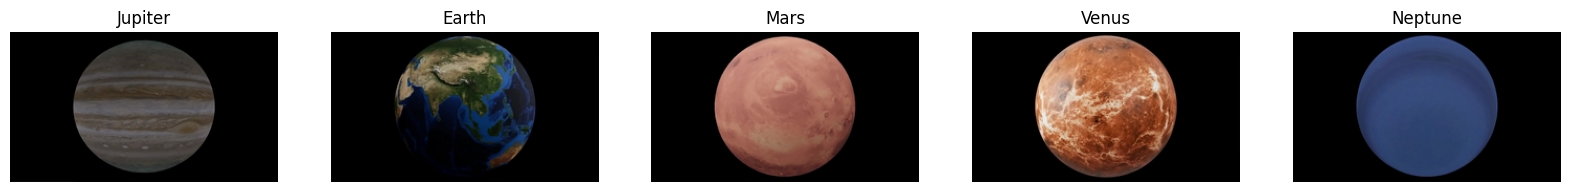

In [3]:

# Select 5 random classes
selected_classes = random.sample(planets, 5)

# Create a figure with 5 subplots
plt.figure(figsize=(20, 6))
for i, planet in enumerate(selected_classes):
    # Get a list of image files for the current planet
    planet_dir = os.path.join(data_dir, planet)
    files = os.listdir(planet_dir)
    
    # Select a random image from the current planet
    file = random.choice(files)
    image_path = os.path.join(planet_dir, file)
    
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(planet)

plt.show()



In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, SpatialDropout2D, Dropout
batch_size = 16
nb_classes =4
nb_epochs = 10
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(240, 240, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 120, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 60, 60, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

2024-02-26 15:57:52.696784: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(128, (2,2), strides=(2,2), padding='same', activation='relu', use_bias=True, input_shape=(256, 256, 3)),
    BatchNormalization(),
    SpatialDropout2D(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Conv2D(256, (2,2), strides=(2,2), padding='same', activation='relu', use_bias=True),
    SpatialDropout2D(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Conv2D(512, (2,2), strides=(2,2), padding='same', activation='relu', use_bias=True),
    SpatialDropout2D(0.2),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, batch_size=batch_size, epochs=nb_epochs, verbose=1)

# Assuming you have a test generator named test_generator
evaluation = model.evaluate(test_generator)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Epoch 1/10
23/23 [==============================] - 32s 1s/step - loss: 1.4295 - accuracy: 0.4881
Epoch 2/10
23/23 [==============================] - 29s 1s/step - loss: 0.5449 - accuracy: 0.7860
Epoch 3/10
23/23 [==============================] - 31s 1s/step - loss: 0.4193 - accuracy: 0.8322
Epoch 4/10
23/23 [==============================] - 31s 1s/step - loss: 0.2234 - accuracy: 0.9147
Epoch 5/10
23/23 [==============================] - 31s 1s/step - loss: 0.1562 - accuracy: 0.9399
Epoch 6/10
23/23 [==============================] - 32s 1s/step - loss: 0.1721 - accuracy: 0.9552
Epoch 7/10
23/23 [==============================] - 28s 1s/step - loss: 0.2096 - accuracy: 0.9203
Epoch 8/10
23/23 [==============================] - 31s 1s/step - loss: 0.1005 - accuracy: 0.9664
Epoch 9/10
23/23 [==============================] - 33s 1s/step - loss: 0.0536 - accuracy: 0.9832
Epoch 10/10
15/15 [==============================] - 7s 450ms/step - loss: 0.7124 - accuracy: 0.9581
Test Loss: 0.7123

1/1 [==============================] - 0s 27ms/step


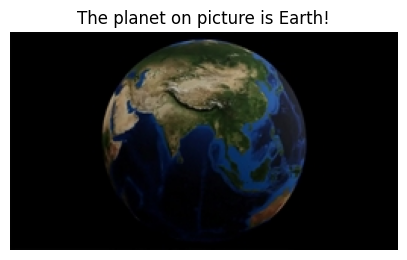

1/1 [==============================] - 0s 20ms/step


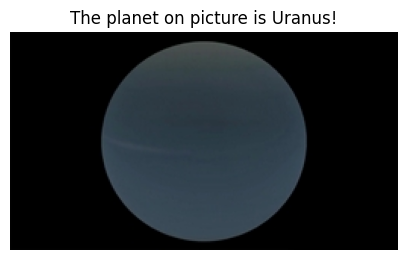

1/1 [==============================] - 0s 22ms/step


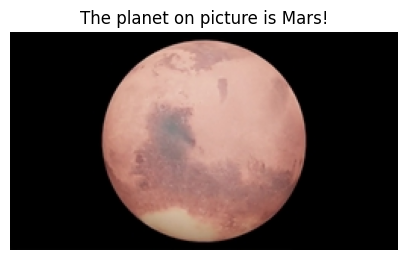

1/1 [==============================] - 0s 23ms/step


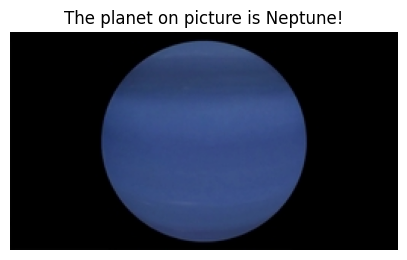

1/1 [==============================] - 0s 23ms/step


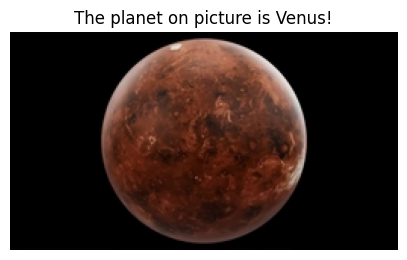

In [34]:
from tensorflow.keras.preprocessing import image
# Get a random sample of 5 images from the original dataset
random_planets = random.sample(os.listdir(data_dir), 5)

for planet in random_planets:

    random_image = random.sample(os.listdir( os.path.join(data_dir, planet) ), 1)
    
    # Load the image
    img_path = os.path.join(data_dir, planet, random_image[0])
    img = image.load_img(img_path, target_size=(256,256))
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Preprocess the image (resize and normalize) and make a prediction
    img_input = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_input)
    predicted_class = planets[np.argmax(prediction)]

    # Display the image and the predicted class
    plt.figure(figsize=(5, 6))
    real_img = image.load_img(img_path)
    plt.imshow(real_img)
    plt.axis('off')
    plt.title(f"The planet on picture is {predicted_class}!")
    plt.show()



# Satelites classification

In [1]:

# Path to the directory containing your dataset
satellites_dir = 'satelits'

# List of planet names
home_planets = ['Earth', 'Jupiter', 'Mars', 'Saturn']
classes = ['Moon', 'Ganymede', 'Callisto', 'Io', 'Europa', 'Deimos', 'Phobos', 'Enceladus', 'Rhea', 'Titan', 'Mimas']

# Create empty lists to store file paths and corresponding labels
satellites = []
file_paths = []
labels = []

# Iterate through each home planet
for home_planet in home_planets:
    home_planet_dir = os.path.join(satellites_dir, home_planet)
    for f in os.listdir(home_planet_dir):
        satellites.append(os.path.join(satellites_dir, home_planet, f)) 

for i, satellite in enumerate(satellites):
    files = os.listdir(satellite)
    file_paths += [os.path.join(satellite, file) for file in files]
    labels += [i] * len(files)

for s in satellites:
    print(s)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.4, stratify=labels, random_state=42)

# Convert labels to strings
y_train = [str(label) for label in y_train]
y_test = [str(label) for label in y_test]

# Use ImageDataGenerator to load and augment images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Randomly zoom into images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,
    fill_mode='nearest'  # Fill in missing pixels with the nearest value)  # Normalize pixel values to [0, 1]
)

# Specify batch size and target image size
batch_size = 32
target_size = (256, 256)  # Target size for resizing images

# Create generators for training and testing data
train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}),
    directory=None,
    x_col='filename',
    y_col='class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'raw' for integer labels
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_test, 'class': y_test}),
    directory=None,
    x_col='filename',
    y_col='class',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'raw' for integer labels
    shuffle=False
)





NameError: name 'os' is not defined

In [58]:
model.fit(train_generator, batch_size=batch_size, epochs=nb_epochs, verbose=1)
evaluation = model.evaluate(test_generator)

Epoch 1/10
10/10 [==============================] - 17s 2s/step - loss: 5.3803 - accuracy: 0.2905
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 2.0988 - accuracy: 0.3750
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 1.8196 - accuracy: 0.4088
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 1.7225 - accuracy: 0.4459
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 1.5647 - accuracy: 0.4831
Epoch 6/10
10/10 [==============================] - 16s 1s/step - loss: 1.6086 - accuracy: 0.4291
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 1.5438 - accuracy: 0.4764
Epoch 8/10
10/10 [==============================] - 16s 2s/step - loss: 1.4681 - accuracy: 0.4899
Epoch 9/10
10/10 [==============================] - 16s 2s/step - loss: 1.4760 - accuracy: 0.4764
Epoch 10/10
7/7 [==============================] - 4s 523ms/step - loss: 1.9775 - accuracy: 0.4721


In [59]:
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Test Loss: 1.977451205253601
Test Accuracy: 0.4720812141895294


1/1 [==============================] - 0s 33ms/step


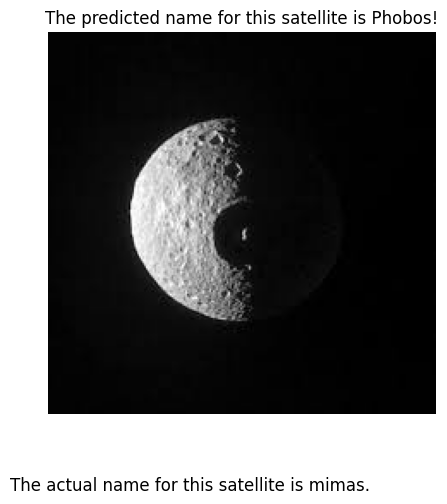

1/1 [==============================] - 0s 27ms/step


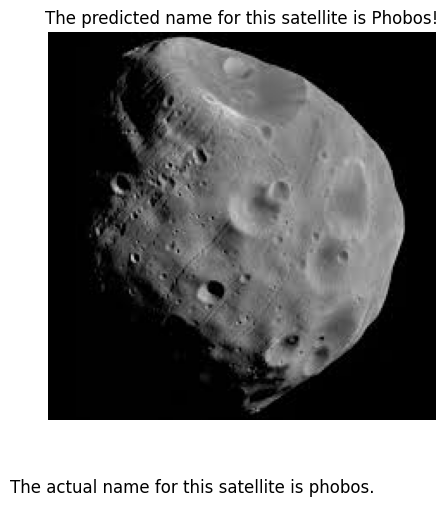

1/1 [==============================] - 0s 25ms/step


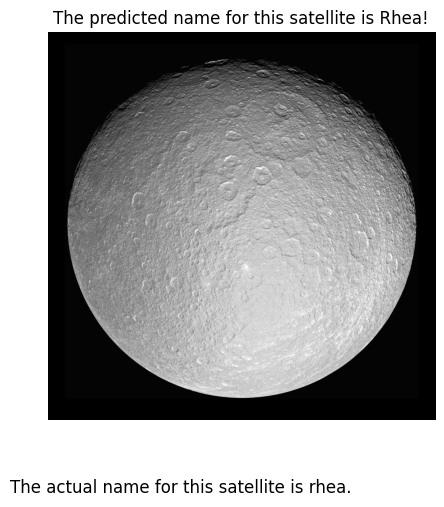

1/1 [==============================] - 0s 26ms/step


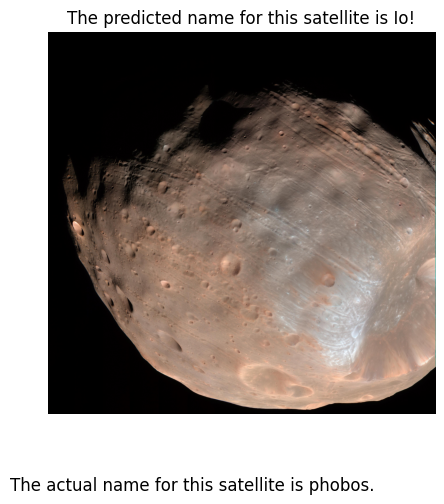

1/1 [==============================] - 0s 21ms/step


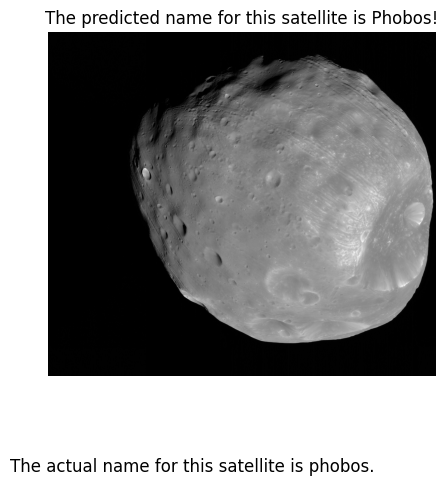

In [78]:
# Get a random sample of 5 images from the original dataset
random_planets = random.choices(home_planets, k=5)

for planet in random_planets:

    random_satellite = random.sample(os.listdir( os.path.join(satellites_dir, planet) ), 1)
    

    random_image = random.sample(os.listdir( os.path.join(satellites_dir, planet,random_satellite[0]) ), 1)

    # Load the image
    img_path = os.path.join(satellites_dir, planet,random_satellite[0], random_image[0])
    img = image.load_img(img_path, target_size=(256,256))
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Preprocess the image (resize and normalize) and make a prediction
    img_input = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_input)
    predicted_class = classes[np.argmax(prediction)]

    # Display the image and the predicted class
    plt.figure(figsize=(5, 6))
    real_img = image.load_img(img_path)
    plt.imshow(real_img)
    plt.axis('off')
    plt.title(f"The predicted name for this satellite is {predicted_class}!")
    plt.figtext(0.05, 0.05, f"The actual name for this satellite is {random_satellite[0]}.", fontsize=12)
    plt.show()
    

    

In [75]:
model.save("modelP")

INFO:tensorflow:Assets written to: modelP/assets


INFO:tensorflow:Assets written to: modelP/assets
